In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [22]:
# Load the dataset
df = pd.read_csv('Customer Churn.csv')

# Display basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [23]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df["customerID"].duplicated().sum()

np.int64(0)

# **Exploratory Data Analysis (EDA)**

Visualizing Churn Distribution

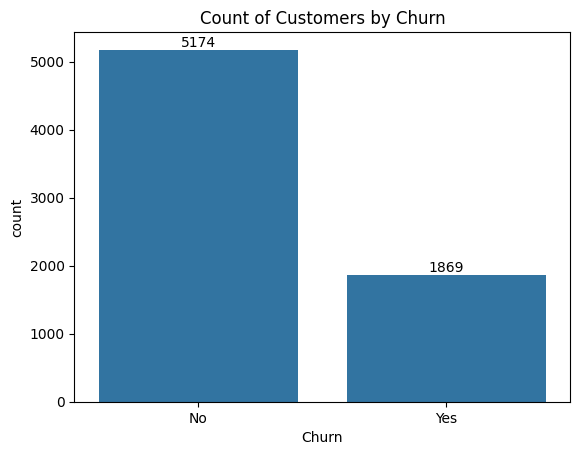

In [8]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

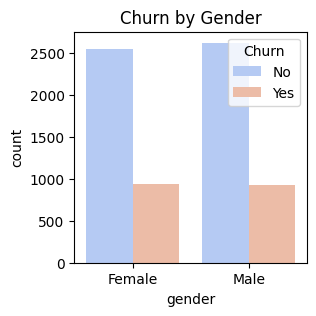

In [9]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender", data = df, hue = "Churn",palette='coolwarm')
plt.title("Churn by Gender")
plt.show()

The plot shows that churning is not gender specific

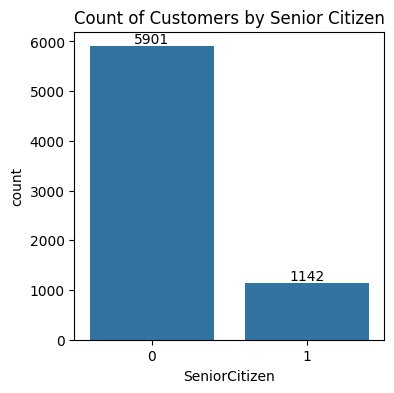

In [10]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

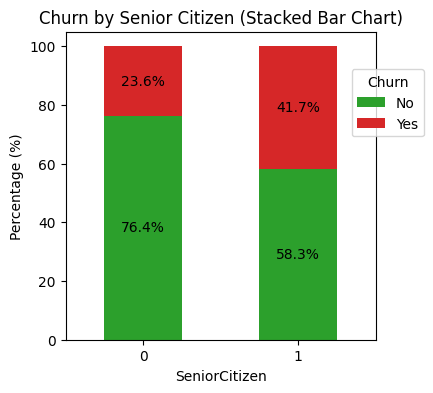

In [11]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#2ca02c', '#d62728'])

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

From the pie chart we can conclude that 26.54% of our customers have churned out accounting to 1869 of the customers.

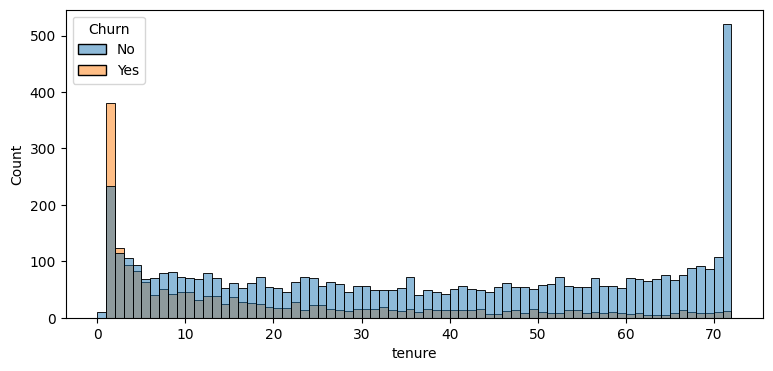

In [12]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

People who have used our services for a long time have stayed and people who have used our sevices

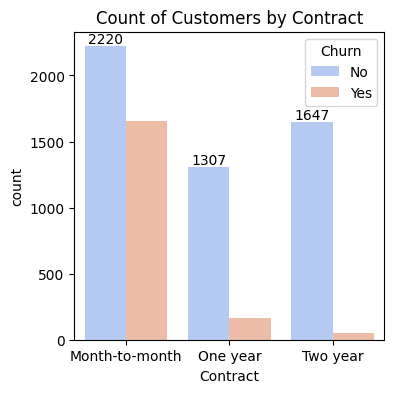

In [13]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn",palette='coolwarm')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

People who have month to month contract are likely to churn then from those who have 1 or 2 years or contract.

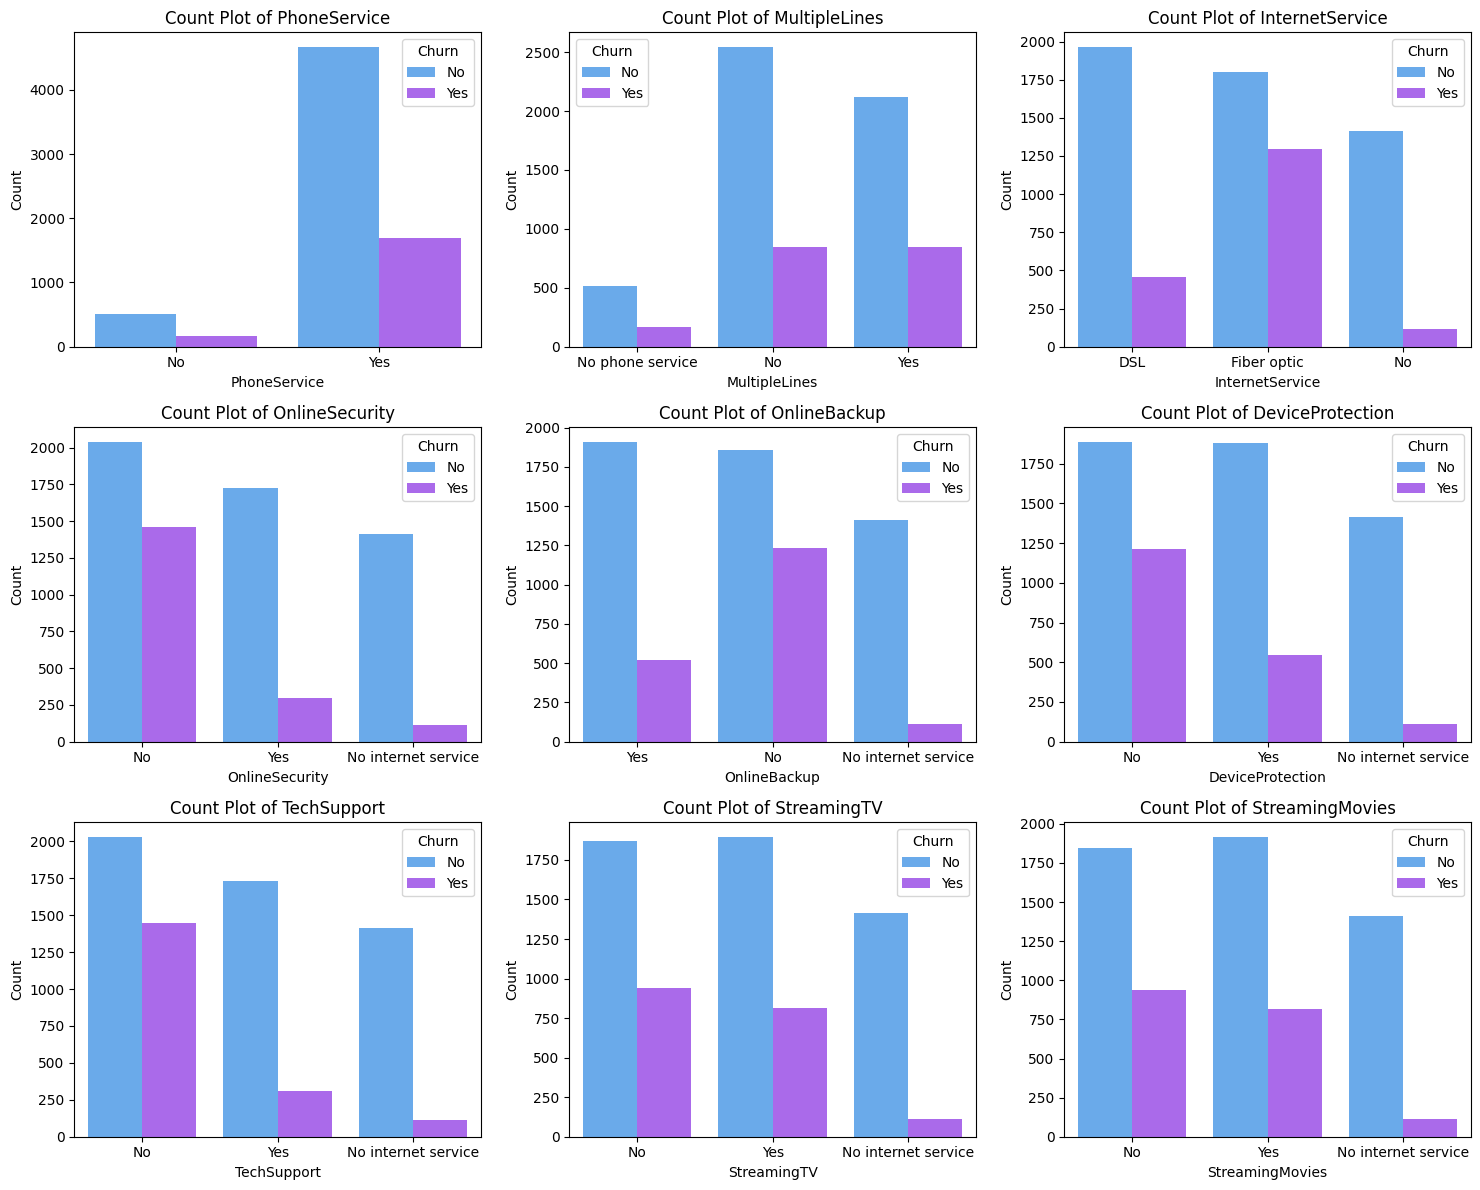

In [14]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"],palette='cool')
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable

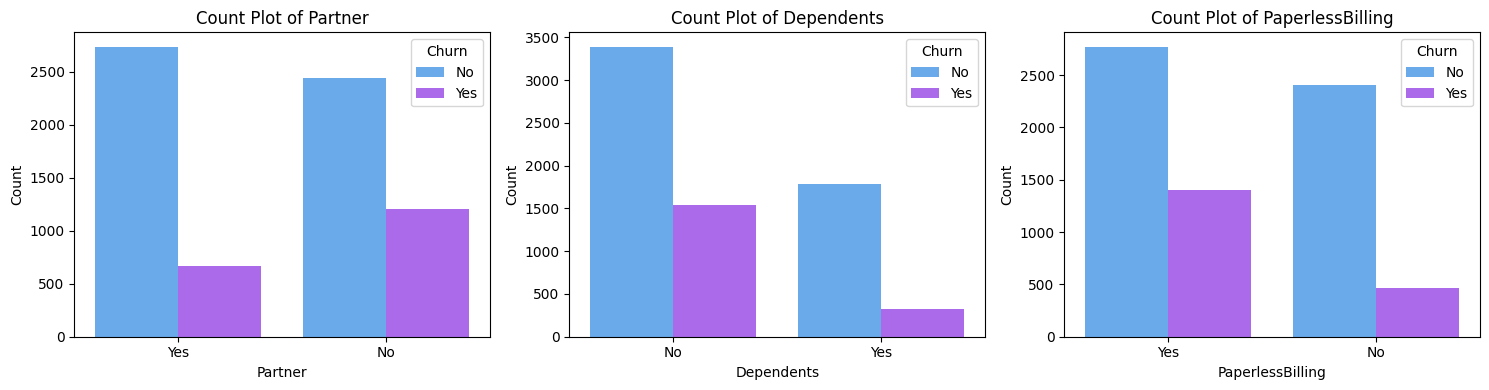

In [25]:
columns = ['Partner', 'Dependents','PaperlessBilling']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"],palette='cool')
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Customers with partners or dependents are significantly less likely to churn, while those using paperless billing show a slightly higher churn rate.

In [27]:
# Encode categorical columns
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

print(df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   


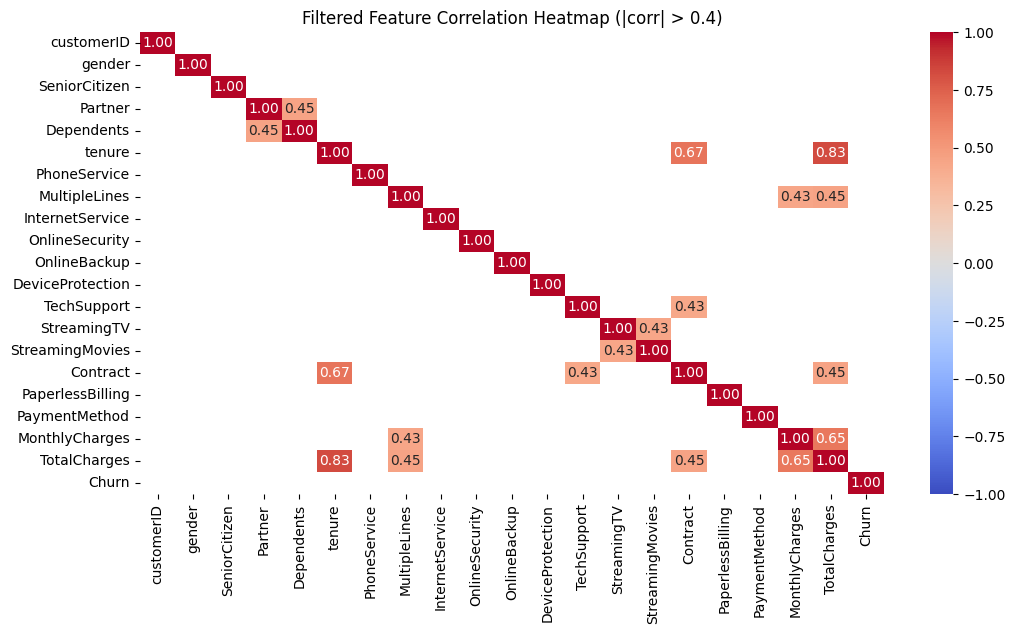

In [17]:
corr_matrix = df.corr()

# Plot heatmap
filtered_corr = corr_matrix[(corr_matrix.abs() > 0.4)]

# Mask to hide NaNs (so they don't appear in the heatmap)
mask = np.isnan(filtered_corr)

# Plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, vmin=-1, vmax=1)
plt.title('Filtered Feature Correlation Heatmap (|corr| > 0.4)')
plt.show()

The heatmap analysis reveals several strong correlations between key features. Notably, tenure and TotalCharges (0.83) show the highest positive correlation, indicating that customers who have been with the company longer tend to accumulate higher total charges. Similarly, tenure and Contract (0.67) suggest that longer tenure customers are more likely to have long-term contracts, reinforcing the link between contract type and customer retention. Other notable correlations include Partner and Dependents (0.45), MultipleLines with both MonthlyCharges (0.43) and TotalCharges (0.45), and TechSupport with Contract (0.43). These insights suggest that customer engagement, service adoption, and billing behavior are closely interconnected, which can be leveraged to enhance customer retention strategies.

In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


# **Model Training**

The selected features are based on correlation analysis, visualizations, and business logic.

In [36]:
from sklearn.model_selection import train_test_split
X = df[ ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','tenure',
         'MonthlyCharges', 'TotalCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


Since tenure, MonthlyCharges, and TotalCharges have different ranges, scaling improves model performance.

In [38]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features to scale
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [41]:
X_train

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
2142,0,1,1,0,0,2,0,2,0,0,2,1,0,3,-0.465683,-0.000474,-0.419925
1623,0,0,1,2,1,0,2,0,0,2,2,2,1,0,0.885537,1.074754,1.256017
6074,1,0,0,1,0,0,0,0,0,0,0,0,1,2,-1.284605,-1.376499,-1.000283
1362,0,0,1,0,1,0,0,0,0,0,0,0,1,2,-1.161766,0.177346,-0.905497
6754,0,1,1,2,0,2,2,0,2,0,0,2,1,0,-1.325551,-0.098524,-1.010646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,2,0,0,0,2,2,0,1,2,-1.284605,1.001632,-0.968666
5191,1,1,1,2,0,2,2,2,2,2,2,2,1,1,-0.383791,0.872006,-0.039235
5226,1,1,1,0,2,1,1,1,1,1,1,0,1,2,-0.834198,-1.452945,-0.875405
5390,0,0,1,2,1,0,0,2,0,2,2,0,1,2,-0.834198,1.149538,-0.480309


# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Model Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8133427963094393
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.67      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



## Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7920511000709723
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



 Logistic Regression performs better overall because of higher accuracy,better recall and F1-score for churn cases and also handles class imbalance betterwhile, Random Forest is worse at detecting churn cases, as it has lower recall. However, it might improve with hyperparameter tuning.



# SMOTE (Synthetic Minority Oversampling)
For balancing churn cases before training.

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [46]:
log_model = LogisticRegression()
log_model.fit(X_train_sm, y_train_sm)

# Predictions
y_pred_log = log_model.predict(X_test)

# Model Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7508871540099361
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.75      0.76      1409



In [47]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_sm, y_train_sm)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7750177430801988
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1036
           1       0.57      0.64      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



Both Logistic Regression and Random Forest provide valuable insights into customer churn, each with its strengths.

Logistic Regression excels in identifying actual churn cases with a high recall of 83%, making it a better choice when the goal is to minimize false negatives (i.e., ensuring most churners are correctly detected). However, its precision is lower (52%), meaning it also misclassifies some non-churners as churners.

Random Forest, on the other hand, offers a more balanced approach with higher precision (57%) and slightly better overall accuracy (77.5%), but it sacrifices recall (64%). This means it is better at correctly predicting churners without excessive false alarms but may miss some actual churn cases.

Final Recommendation: If the priority is to identify and retain at-risk customers (churners), Logistic Regression is preferable due to its high recall. However, if the goal is a more balanced prediction with fewer false churn alarms, Random Forest is the better option. Further improvements could be achieved through hyperparameter tuning.

# Grid Search for best hyperparameters of Random forest classifier

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_sm, y_train_sm)
print(grid_search.best_params_)


{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [51]:
# Train the final Random Forest model with best parameters
best_rf_model = RandomForestClassifier(n_estimators=200,
                                       max_depth=20,
                                       min_samples_split=2,
                                       random_state=42)

best_rf_model.fit(X_train_sm, y_train_sm)  # Train on SMOTE-balanced data


RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [52]:
y_pred_rf_best = best_rf_model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Print Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_best))

# Print Classification Report
print(classification_report(y_test, y_pred_rf_best))

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))


Random Forest Accuracy: 0.7707594038325053
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1036
           1       0.56      0.66      0.60       373

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409

Confusion Matrix:
 [[839 197]
 [126 247]]


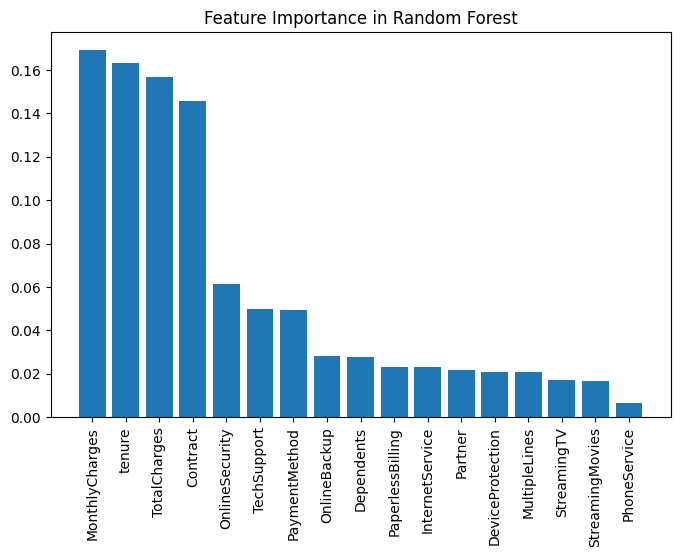

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = best_rf_model.feature_importances_
features = X_train.columns

# Sort and plot
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(8, 5))
plt.title("Feature Importance in Random Forest")
plt.bar(range(len(features)), feature_importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.show()


In [55]:
# Define the parameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers to use
    'penalty': ['l1', 'l2'],  # Regularization type
    'max_iter': [100, 200, 300],  # Max iterations for optimization
}

# Create Logistic Regression model
log_reg = LogisticRegression()

# Apply GridSearchCV
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search_log_reg.fit(X_train_sm, y_train_sm)

# Best parameters
print("Best parameters for Logistic Regression:", grid_search_log_reg.best_params_)

# Use the best model
best_log_reg_model = grid_search_log_reg.best_estimator_

# Predictions
y_pred_log_reg_best = best_log_reg_model.predict(X_test)

# Model Evaluation
print("Logistic Regression Accuracy with best params:", accuracy_score(y_test, y_pred_log_reg_best))
print(classification_report(y_test, y_pred_log_reg_best))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Accuracy with best params: 0.7494677075940384
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.81      0.75      0.76      1409



In [56]:
# Get coefficients for Logistic Regression
coefficients = pd.DataFrame(log_model.coef_[0], X.columns, columns=['Coefficient'])

# Sort by the absolute value of the coefficients to identify important features
coefficients['AbsCoefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='AbsCoefficient', ascending=False)

# Print the most important features based on absolute value of coefficients
print(coefficients[['Coefficient', 'AbsCoefficient']])


                  Coefficient  AbsCoefficient
tenure              -1.292344        1.292344
Contract            -1.157342        1.157342
PhoneService        -1.032560        1.032560
TotalCharges         0.795055        0.795055
Dependents          -0.668654        0.668654
MonthlyCharges       0.652360        0.652360
OnlineSecurity      -0.303231        0.303231
TechSupport         -0.226908        0.226908
InternetService      0.200779        0.200779
Partner             -0.173369        0.173369
OnlineBackup        -0.157199        0.157199
DeviceProtection    -0.049181        0.049181
PaymentMethod       -0.045341        0.045341
StreamingMovies      0.042662        0.042662
PaperlessBilling     0.037130        0.037130
MultipleLines        0.009681        0.009681
StreamingTV          0.007625        0.007625


**Negative Impact on Churn**:
tenure (-1.29) and Contract (-1.16) have the largest negative coefficients. This suggests that customers with longer tenure and those on long-term contracts are less likely to churn.
PhoneService (-1.03) and Dependents (-0.67) also show a negative impact on churn, implying that customers with a phone service and dependents are less likely to churn.
OnlineSecurity (-0.30) and TechSupport (-0.23) also contribute negatively to churn, indicating that customers who have these services are less likely to churn.




**Positive Impact on Churn:**
TotalCharges (0.80) and MonthlyCharges (0.65) are the most significant positive contributors to churn. Higher charges are correlated with an increased likelihood of churn.
InternetService (0.20) and StreamingMovies (0.04) have a slightly positive association with churn, indicating that customers using these services may have a higher likelihood of churning.
PaperlessBilling (0.04) also has a slight positive impact on churn, suggesting that customers who opt for paperless billing are more likely to churn.


**Lower Impact Features:**
Partner, MultipleLines, and StreamingTV show very small positive coefficients, indicating that these features have a relatively minimal impact on churn.

In [57]:
# Get feature importances from Random Forest model
importances = pd.DataFrame(rf_model.feature_importances_, X.columns, columns=['Importance'])

# Sort the importances to identify the most useful features
importances = importances.sort_values(by='Importance', ascending=False)

# Print the most important features based on importance scores
print(importances)


                  Importance
MonthlyCharges      0.171822
TotalCharges        0.160836
tenure              0.160218
Contract            0.138687
OnlineSecurity      0.061263
TechSupport         0.050253
PaymentMethod       0.049744
OnlineBackup        0.031389
Dependents          0.028683
PaperlessBilling    0.023011
InternetService     0.022350
Partner             0.021097
MultipleLines       0.020785
DeviceProtection    0.020048
StreamingMovies     0.017111
StreamingTV         0.016613
PhoneService        0.006089


**Most Important Features:**
MonthlyCharges (0.17) and TotalCharges (0.16) are the top two most important features. These features have a direct relationship with churn, where higher charges increase the likelihood of churn.
tenure (0.16) and Contract (0.14) are also significant. The longer the tenure and the more likely a customer has a long-term contract, the less likely they are to churn.


**Moderate Impact:**
OnlineSecurity (0.06) and TechSupport (0.05) are important for reducing churn, showing that these services play a role in customer retention.
PaymentMethod (0.05) and OnlineBackup (0.03) also show a moderate effect on churn, implying that payment preferences and additional services can impact churn rates.


**Less Important Features:**
Dependents (0.03), PaperlessBilling (0.02), and InternetService (0.02) have a lower importance, but still contribute to churn prediction.
Partner (0.02), MultipleLines (0.02), DeviceProtection (0.02), and StreamingMovies (0.02) show minimal importance, suggesting these features have a relatively small influence on churn.

## Therefore from our study we can say that:
*  High impact features for predicting churn include MonthlyCharges, TotalCharges, tenure, and Contract.
*   Customers with longer tenure, long-term contracts, PhoneService, Dependents, and TechSupport are less likely to churn.
*   Customers with higher charges and those with paperless billing are more likely to churn.
*   OnlineSecurity, StreamingMovies, and PaymentMethod are also moderately influential.
*   Partner, MultipleLines, and StreamingTV have a minimal influence on churn and may not need to be prioritized for churn prediction.





**By** focusing on the features with the highest coefficients and importances, businesses can develop more effective strategies for reducing churn, such as targeting customers with high monthly charges or those without long-term contracts.